In [19]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from os.path import expanduser
home = expanduser("~")
print(home)

/home/vahid


In [20]:
df = pd.read_csv(home +'/Dropbox/data/swarm-manager-data/results/theory/model-results-2x-not-that-late-1x-33p.csv')
print(df.shape)

(2400, 8)


In [21]:
df.head()

,approach,system,steps,min_total_core,max_total_core,resources,classes,sla
0,BNV1-4.0,system_1,5,110.0,110.0,10,12,300.0
1,BNV1-2.0,system_1,8,70.0,70.0,10,12,300.0
2,BNV1-1.0,system_1,22,59.0,59.0,10,12,300.0
3,BNV1-0.5,system_1,45,57.5,57.5,10,12,300.0
4,BNV2-2.0,system_1,18,59.5,62.0,10,12,300.0


In [22]:
approaches = list(df['approach'].unique())
approaches

['BNV1-4.0',
 'BNV1-2.0',
 'BNV1-1.0',
 'BNV1-0.5',
 'BNV2-2.0',
 'BNV2-4.0',
 'BNV2-1.0',
 'AMPL']

### System Informations 

In [23]:
systems_df = df.groupby(['resources','classes','sla'])['approach'].count().reset_index()
systems_df.columns = ['resources','classes','sla','count']
systems_df['count'] /= len(approaches)
systems_df.head(20)

,resources,classes,sla,count
0,10,12,300.0,100.0
1,10,25,450.0,37.0
2,20,30,300.0,44.0
3,20,30,500.0,45.0
4,30,40,300.0,42.0
5,30,90,600.0,13.0
6,40,90,1000.0,19.0


In [24]:
number_of_test = df['system'].unique().shape[0]
approaches = df['approach'].unique()
failed_core_count = df['max_total_core'].max()
print(failed_core_count)

100000.0


### Average steps count

In [25]:
steps_count = np.round(df[['approach','steps']].groupby('approach').mean().reset_index(),2)
steps_count.head(10)

,approach,steps
0,AMPL,0.00
1,BNV1-0.5,895.62
2,BNV1-1.0,85.65
3,BNV1-2.0,41.22
4,BNV1-4.0,18.92
5,BNV2-1.0,106.96
6,BNV2-2.0,59.73
7,BNV2-4.0,34.57


### How much the pruning stage helped us?

In [26]:
for my_approach in approaches:
    average_reduce_df = df[df.approach == my_approach][['min_total_core','max_total_core']]
    average_reduce_df = (average_reduce_df.max_total_core - average_reduce_df.min_total_core)/average_reduce_df.max_total_core
    print(my_approach, 100*np.round(average_reduce_df.mean(), 2), 100*np.round(average_reduce_df.max(), 2))

BNV1-4.0 0.0 0.0
BNV1-2.0 0.0 0.0
BNV1-1.0 0.0 0.0
BNV1-0.5 0.0 0.0
BNV2-2.0 5.0 17.0
BNV2-4.0 9.0 24.0
BNV2-1.0 4.0 11.0
AMPL -inf -inf


In [27]:
how_much_more = {}
for a in approaches:
    how_much_more[a] = []
for system, rows in df.groupby('system'):
    if system == 'system_249': continue
    base_line_count = rows[rows.approach == 'AMPL'].min_total_core.values[0]
    for _, row in rows.iterrows():
        if row['approach'] in how_much_more and row['min_total_core'] < 10000:
            how_much_more[row['approach']].append((row['min_total_core'] - base_line_count) / row['min_total_core'])
means = np.round(df[['approach','steps']].groupby('approach').mean().reset_index(),2)
print('approach\tCPUs\tsteps')
cpus = {}
steps = {}
for key in sorted(how_much_more.keys()):
    value = how_much_more[key]
    print(key + '\t' + str(np.round(np.mean(value)*100,2)) + '%' + '\t' + str(means[means.approach == key].values[0,1]))
    cpus[key] = np.round(np.mean(value)*100,2)
    steps[key] = means[means.approach == key].values[0,1]

approach	CPUs	steps
AMPL	0.0%	0.0
BNV1-0.5	13.71%	895.62
BNV1-1.0	14.79%	85.65
BNV1-2.0	19.65%	41.22
BNV1-4.0	33.82%	18.92
BNV2-1.0	10.54%	106.96
BNV2-2.0	10.87%	59.73
BNV2-4.0	13.5%	34.57


<ipython-input-28-23575492e60e>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(int(y))+'%' for y in ax2.get_yticks()],fontsize=18)
<ipython-input-28-23575492e60e>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=18)


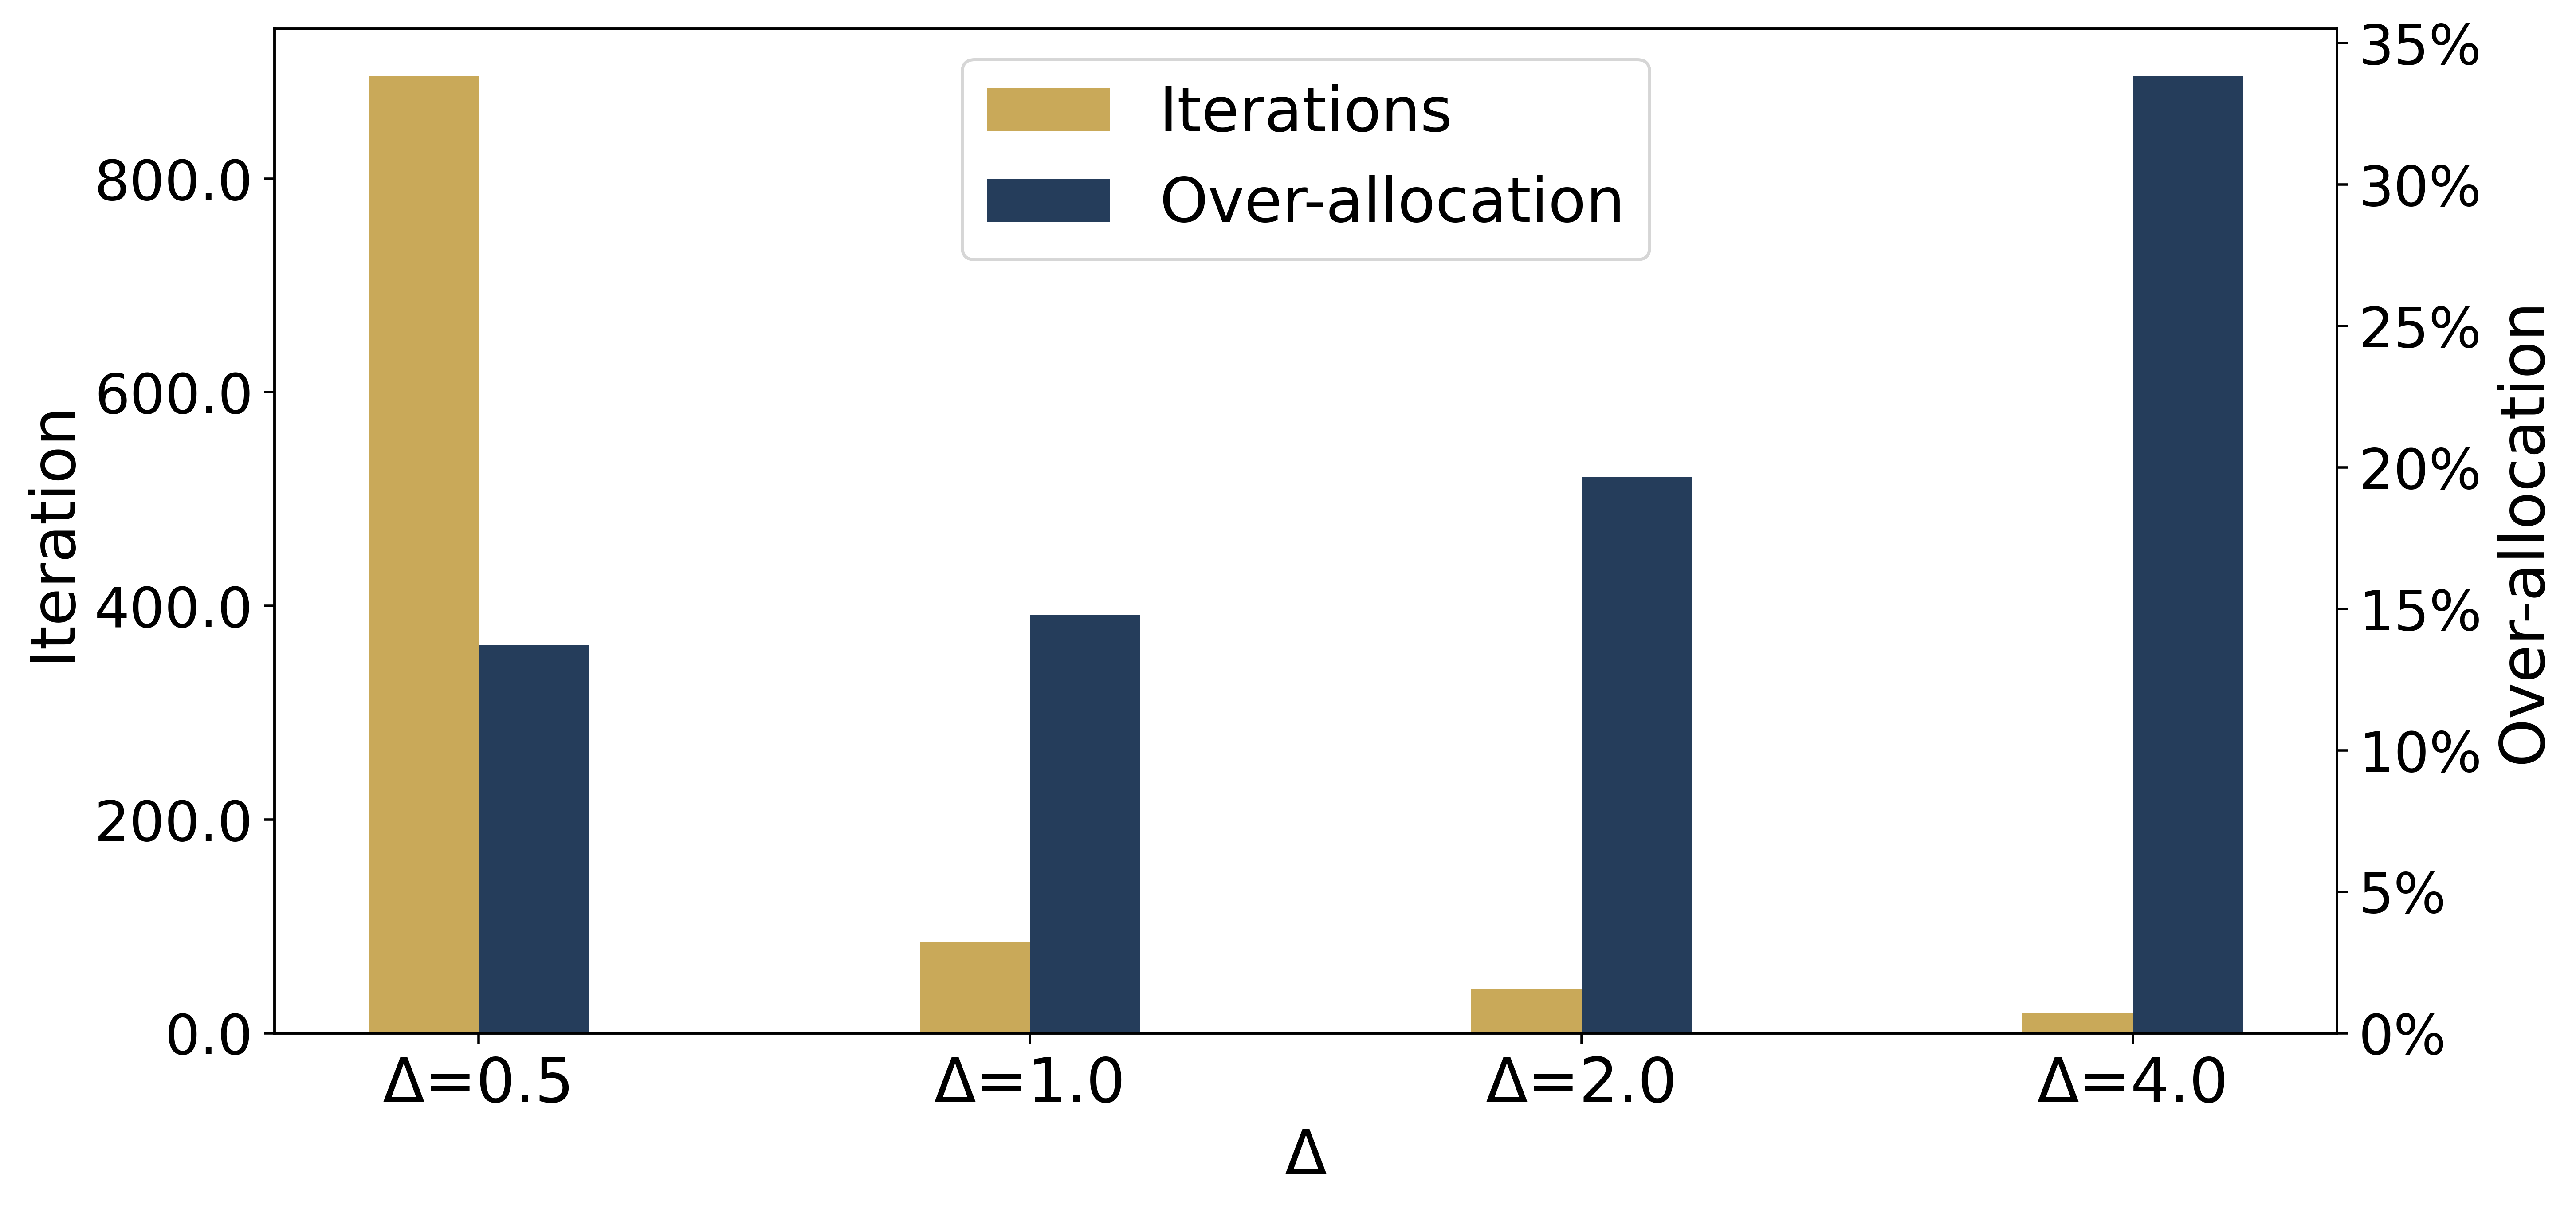

In [28]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

approaches = ['BNV1-0.5','BNV1-1.0','BNV1-2.0','BNV1-4.0']
temp = {'approach':[], 'cpu':[], 'steps':[]}
for a in approaches:
    temp['approach'].append(a)
    temp['cpu'].append(cpus[a])
    temp['steps'].append(steps[a])
data = pd.DataFrame(temp)
data = data.set_index('approach')

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(num=None, figsize=(12, 6), dpi=500, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.1
ax2.bar(approaches, data['cpu'], color='#253D5B', align='edge', width=0.2, label='Over-allocation')
ax.bar(approaches, data['steps'], color='#C9A959', align='edge', width=-0.2, label='Iterations')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')


ax2.set_ylabel('Over-allocation')
# ax.set_yscale('log')
ax.set_ylabel('Iteration')
ax.set_xlabel('\u0394')


ax.set_xticks(approaches)
ax.set_xticklabels(['\u0394=0.5','\u0394=1.0','\u0394=2.0','\u0394=4.0'])

ax2.set_yticklabels([str(int(y))+'%' for y in ax2.get_yticks()],fontsize=18)
ax.set_yticklabels(ax.get_yticks(), fontsize=18)
plt.show()

del approaches
del data

<ipython-input-29-36346d4405dd>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(int(y))+'%' for y in ax2.get_yticks()],fontsize=18)
<ipython-input-29-36346d4405dd>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=18)


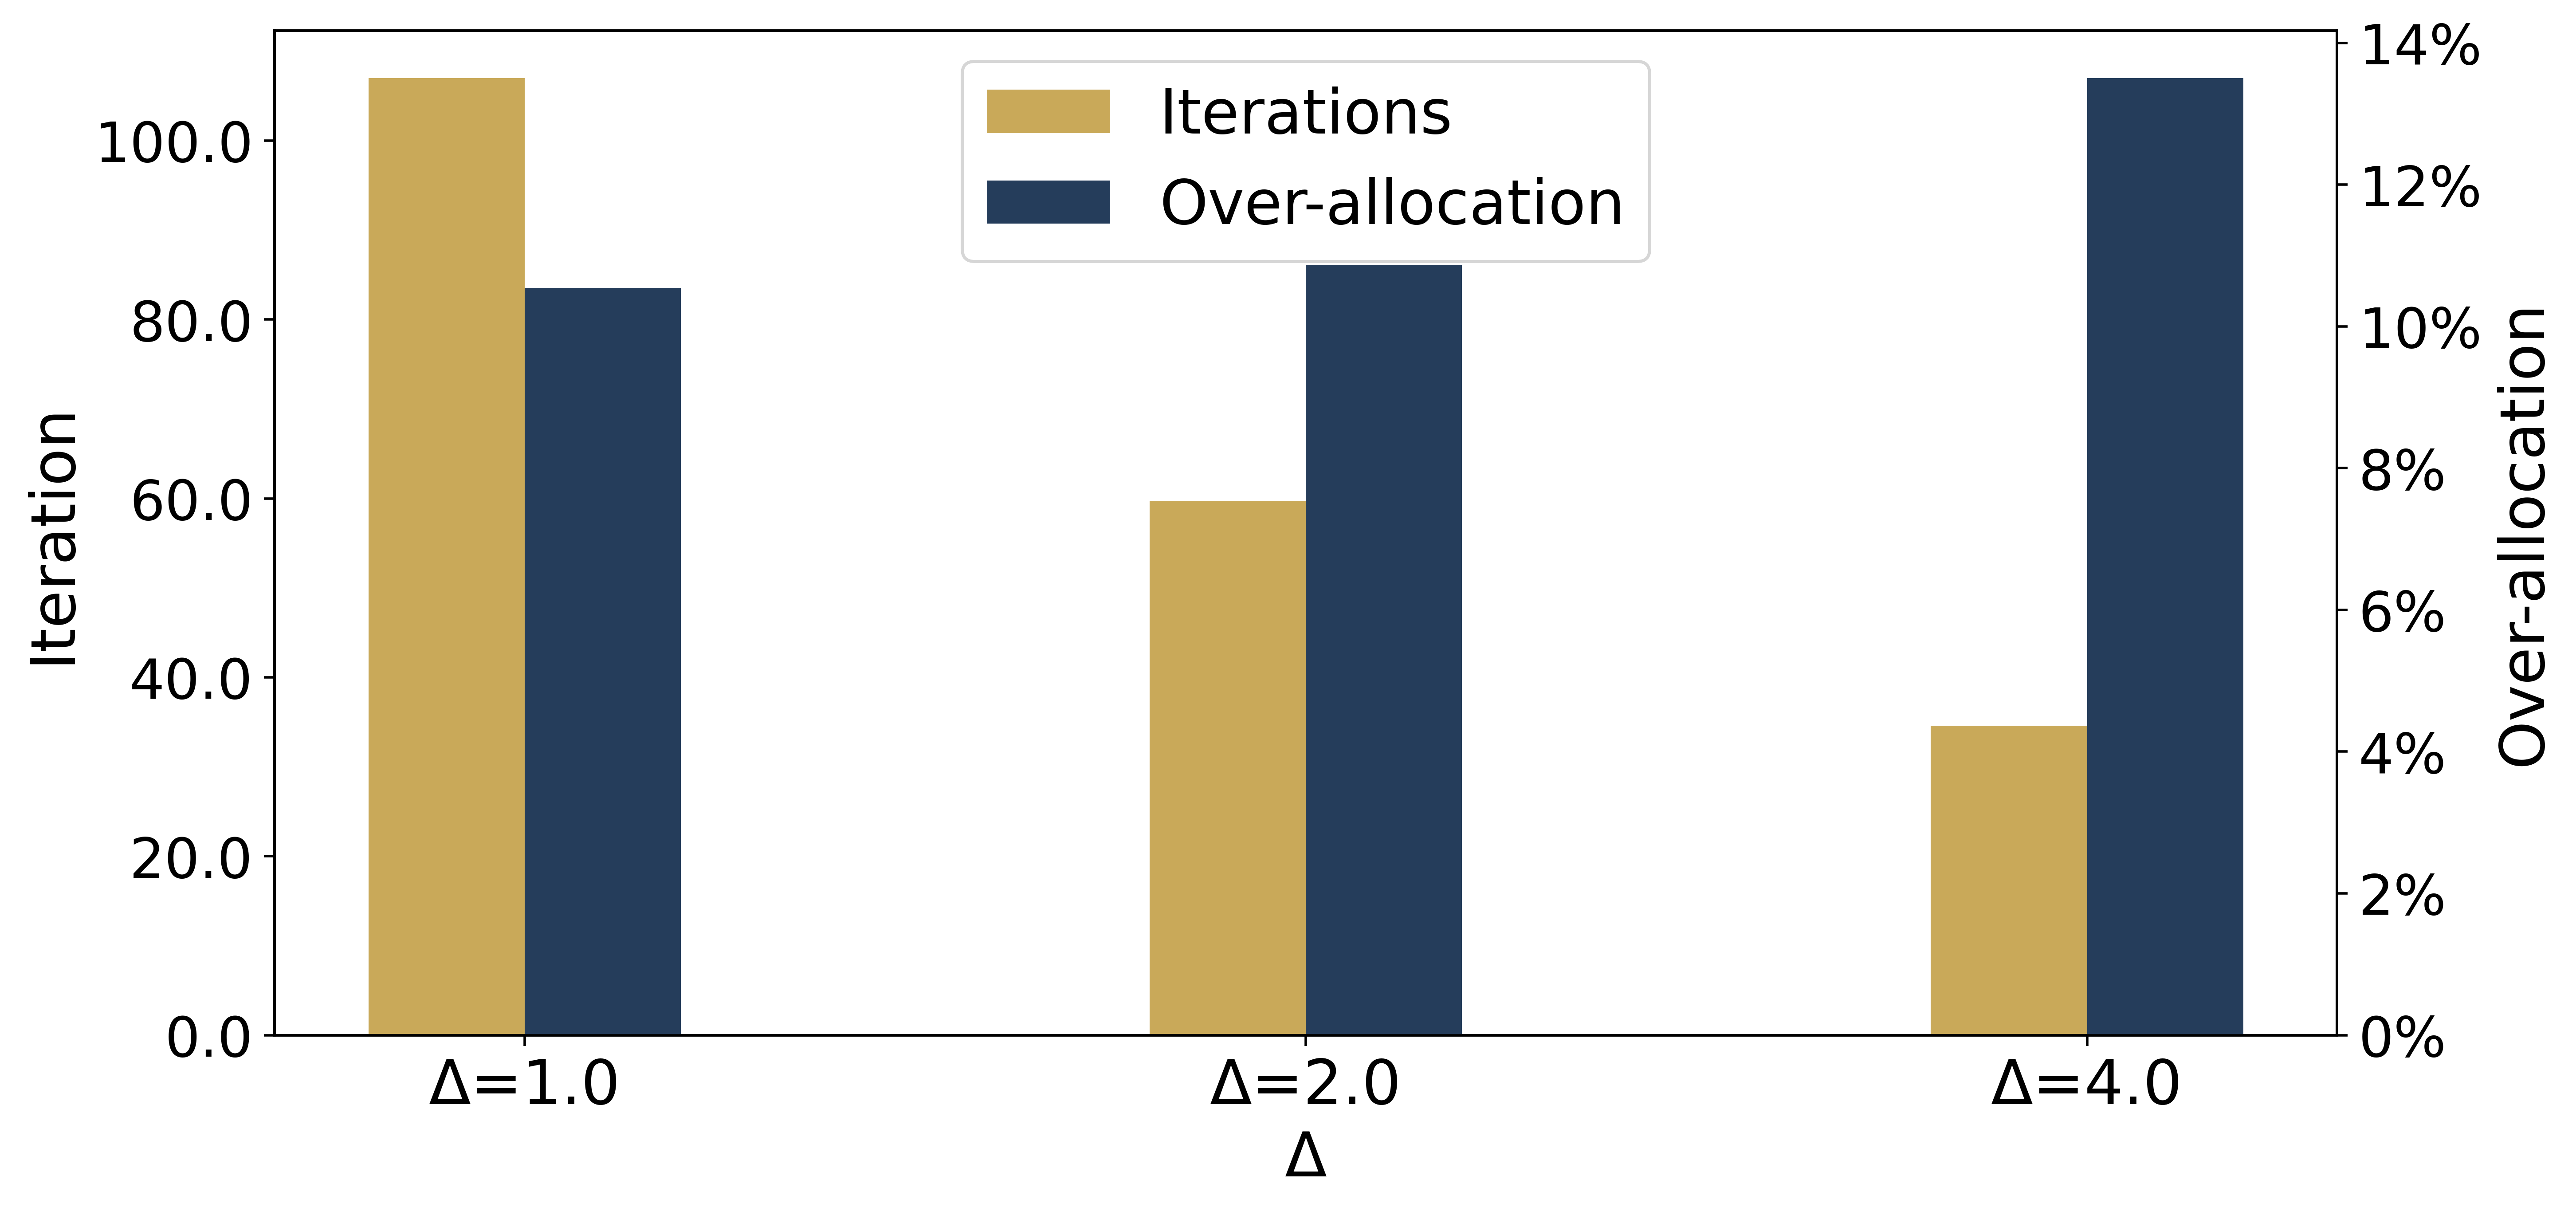

In [29]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

approaches = ['BNV2-1.0','BNV2-2.0','BNV2-4.0']
temp = {'approach':[], 'cpu':[], 'steps':[]}
for a in approaches:
    temp['approach'].append(a)
    temp['cpu'].append(cpus[a])
    temp['steps'].append(steps[a])
data = pd.DataFrame(temp)
data = data.set_index('approach')

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(num=None, figsize=(12, 6), dpi=500, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.1
ax2.bar(approaches, data['cpu'], color='#253D5B', align='edge', width=0.2, label='Over-allocation')
ax.bar(approaches, data['steps'], color='#C9A959', align='edge', width=-0.2, label='Iterations')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')


ax2.set_ylabel('Over-allocation')
# ax.set_yscale('log')
ax.set_ylabel('Iteration')
ax.set_xlabel('\u0394')


ax.set_xticks(approaches)
ax.set_xticklabels(['\u0394=1.0','\u0394=2.0','\u0394=4.0'])

ax2.set_yticklabels([str(int(y))+'%' for y in ax2.get_yticks()],fontsize=18)
ax.set_yticklabels(ax.get_yticks(), fontsize=18)
plt.show()

del approaches
del data

<ipython-input-30-227225e67deb>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+'%' for y in ax.get_yticks()],fontsize=18)


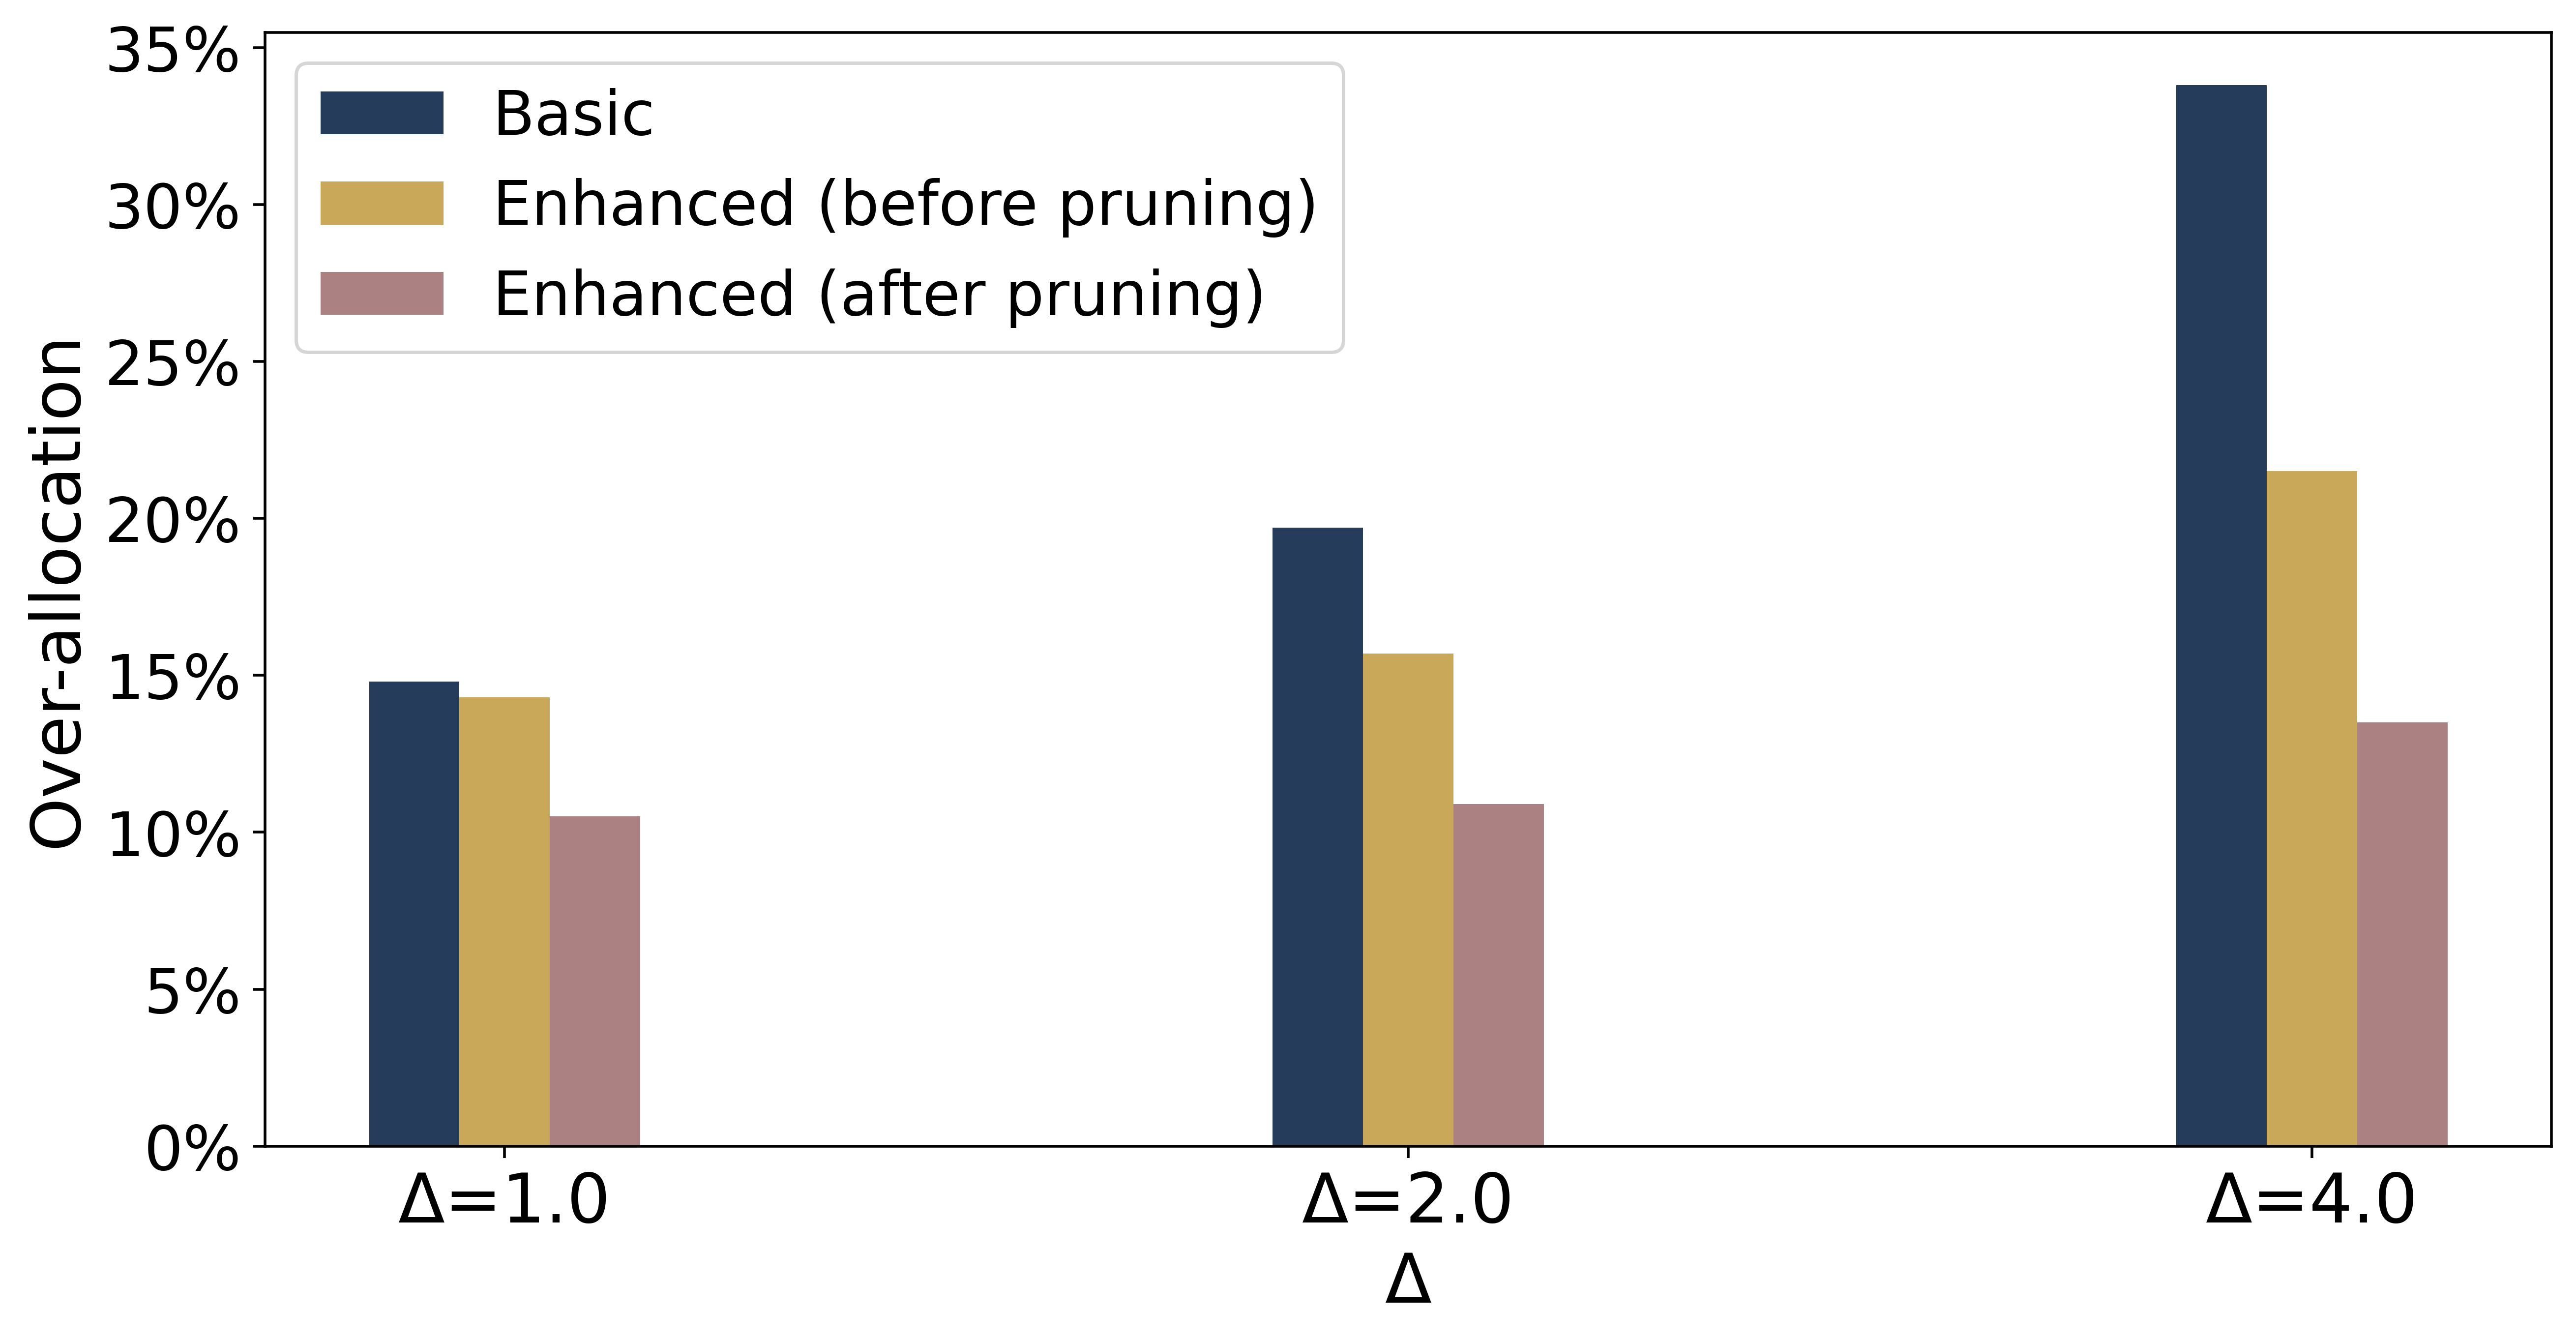

In [30]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

xs = [1,2,3]
deltas = [1.0, 2.0, 4.0]
basic = [14.8,19.7,33.8]
no_prune = [14.3,15.7,21.5]
prune = [10.5,10.9,13.5]

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(num=None, figsize=(12, 6), dpi=500, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.1
ax.bar([x - width for x in xs], basic, color='#253D5B', align='center', width=width, label='Basic')
ax.bar(xs, no_prune, color='#C9A959', align='center', width=width, label='Enhanced (before pruning)')
ax.bar([x + width for x in xs], prune, color='#AC8181', align='center', width=width, label='Enhanced (after pruning)')
# ax.bar(approaches, data['steps'], color='#C9A959', align='edge', width=-0.2, label='required iterations')

# lines, labels = ax.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper center')

ax.set_xlabel('\u0394')
ax.set_ylabel('Over-allocation')
# ax.set_ylabel('average iteration')

ax.set_xticks(xs)
ax.set_xticklabels(['\u0394=' + str(deltas[d-1]) for d in xs])

ax.set_yticklabels([str(int(y))+'%' for y in ax.get_yticks()],fontsize=18)
ax.legend(fontsize=18)
plt.show()



In [31]:
target_system = ''
max_diff = 0
for system in df.system.unique():
    system_df = df[df.system == system]
    
    base_line = system_df[system_df.approach == 'AMPL'].min_total_core.values[0]
    bnv2_count = system_df[system_df.approach == 'BNV2-4.0'].min_total_core.values[0]
    bnv1_count = system_df[system_df.approach == 'BNV1-1.0'].min_total_core.values[0]
    if bnv1_count == 100000: continue
        
    bnv1_count /= base_line
    bnv2_count /= base_line

    if bnv2_count < bnv1_count and bnv1_count - bnv2_count > max_diff:
        max_diff = bnv1_count - bnv2_count
        target_system = system

print(max_diff)
df[df.system == target_system]

0.1734906315058986


,approach,system,steps,min_total_core,max_total_core,resources,classes,sla
2376,BNV1-4.0,system_298,4,182.00,182.0,10,25,450.0
2377,BNV1-2.0,system_298,6,110.00,110.0,10,25,450.0
2378,BNV1-1.0,system_298,14,77.00,77.0,10,25,450.0
2379,BNV1-0.5,system_298,37,69.30,69.3,10,25,450.0
2380,BNV2-2.0,system_298,17,67.70,72.0,10,25,450.0
2381,BNV2-4.0,system_298,10,67.00,82.0,10,25,450.0
2382,BNV2-1.0,system_298,29,66.60,72.0,10,25,450.0
2383,AMPL,system_298,0,57.64,0.0,10,25,450.0


In [32]:
with open(home +'/Dropbox/data/swarm-manager-data/results/theory/system_298.txt') as f:
    lines = f.read().split('\n')
print(len(lines), lines[-1])

124 66.63


<ipython-input-33-21e721e89ded>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=18)
<ipython-input-33-21e721e89ded>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=18)


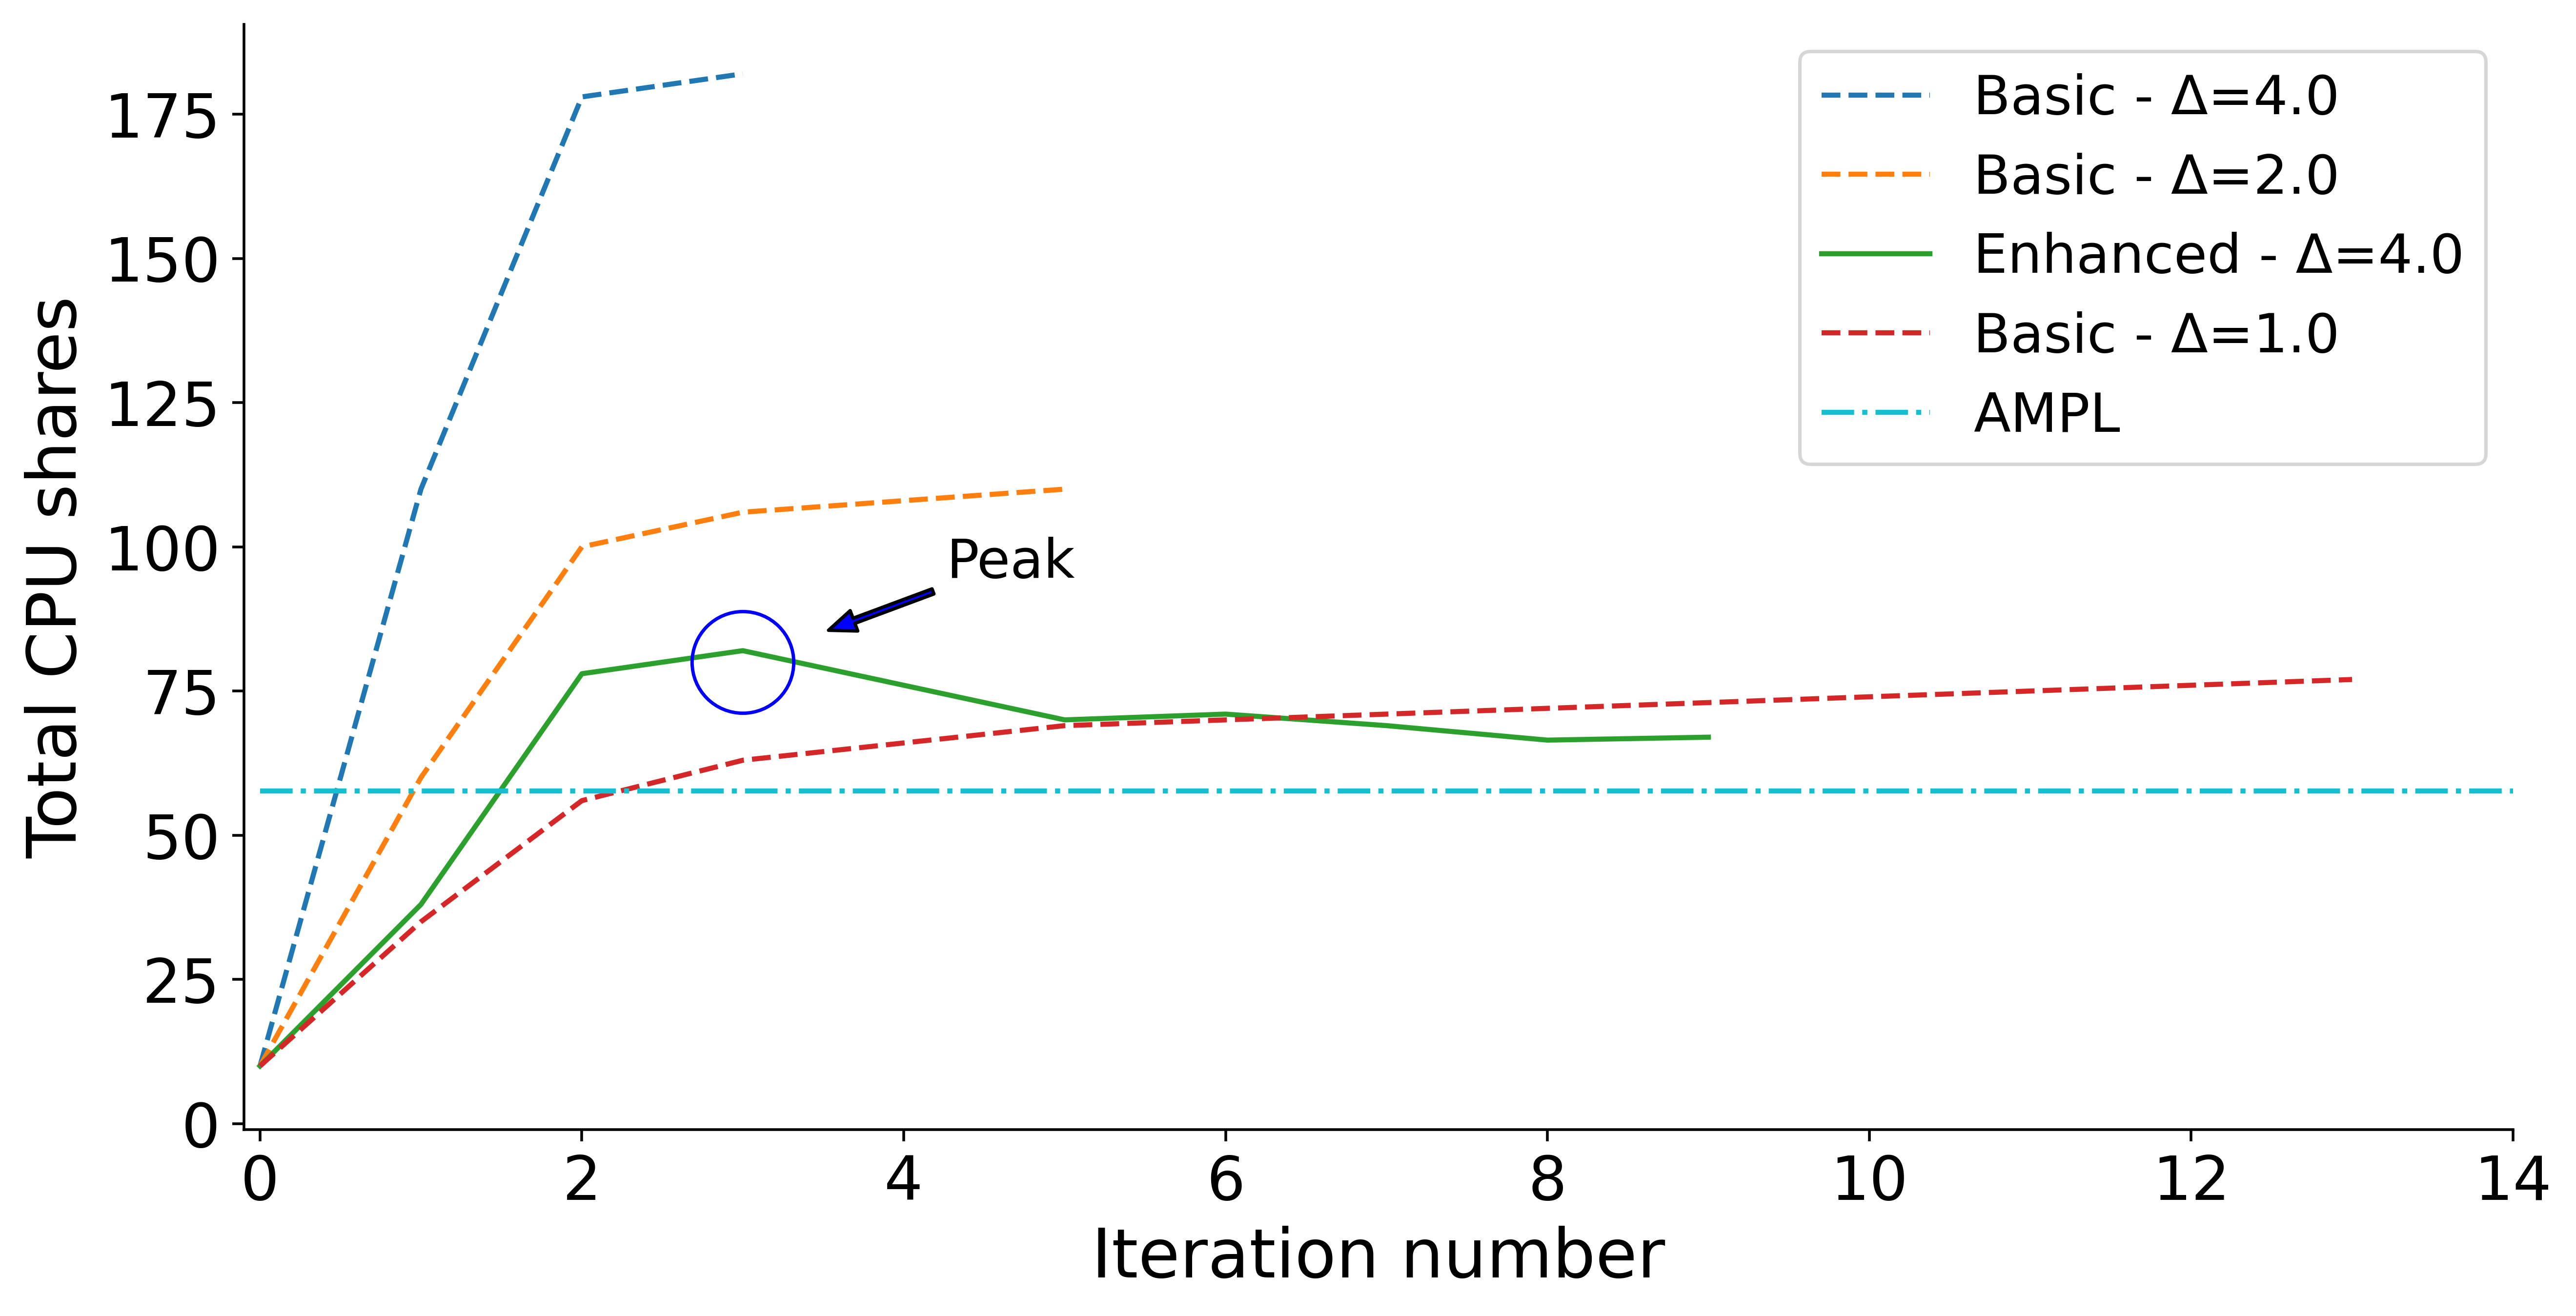

In [33]:
ampl = 57.64
data = {}
current = ''
for l in lines:
    if l[0] == 'B':
        data[l.strip()] = []
        current = l.strip()
    else:
        data[current].append(float(l))
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
del data['BNV1-0.5']
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)



fig = plt.figure(num=None, figsize=(12, 6), dpi=500, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
_max = 0
key2label={
    'BNV1-1.0':'Basic - \u0394=1.0',
    'BNV1-2.0':'Basic - \u0394=2.0',
    'BNV1-4.0':'Basic - \u0394=4.0',
    'BNV2-4.0':'Enhanced - \u0394=4.0'
}
# for key in ['BNV1-1.0','BNV2-1.0','BNV1-2.0','BNV2-2.0','BNV1-4.0','BNV2-4.0',]:
c = 0
for key in ['BNV1-4.0','BNV1-2.0','BNV2-4.0','BNV1-1.0']:

    values = data[key]

    xs = []
    ys = []
    for i, value in enumerate(values):
        xs.append(i)
        ys.append(value)
        
        if i+1 > _max:
            _max = i + 1
    how = ''
    if 'BNV1' in key:
        how = '--'
    else:
        how = '-'

    color = colors[c]
    c += 1
    ax.plot(xs,ys,how, label=key2label[key], color=color)
    
ax.plot([0,_max],[ampl,ampl], '-.', color=colors[-1], label= 'AMPL')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Iteration number')
ax.set_ylabel('Total CPU shares')

ax.set_ylim(bottom=-1)

ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=18)
ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=18)


circle_rad = 15
ax.plot(3, 80, 'o', ms=circle_rad * 2, mec='b', mfc='none', mew=1)
ax.annotate('Peak', xy=(3,80), xytext=(60, 25),
            textcoords='offset points',
            color='black', fontsize=16, 
            arrowprops=dict(
                arrowstyle='simple,tail_width=0.1,head_width=0.4,head_length=0.5',
                facecolor='b', shrinkB=circle_rad * 1.8)
)

ax.legend(fontsize=16, loc='upper right')

ax.set_xbound(lower=-0.1, upper=14)
# ax.set_xlim([0,12])
plt.show()
del data